## Preprocessing

In [33]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [34]:
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [35]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [36]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [37]:
application_df['ORGANIZATION'].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [38]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [39]:
pd.DataFrame.from_records([(col, application_df[col].nunique(), application_df[col].dtype, application_df[col].memory_usage(deep=True) )  for col in application_df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,EIN,34299,int64,274520
1,NAME,19568,object,3088867
2,APPLICATION_TYPE,17,object,2025466
3,AFFILIATION,6,object,2410951
4,CLASSIFICATION,71,object,2126657
5,USE_CASE,5,object,2355342
6,ORGANIZATION,4,object,2191856
7,STATUS,2,int64,274520
8,INCOME_AMT,9,object,2083100
9,SPECIAL_CONSIDERATIONS,2,object,1989470


In [40]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [41]:
import bokeh
from bokeh.plotting import figure, show

p = figure(x_range=application_df['INCOME_AMT'].unique(), height=350, title="Income Amounts",
           toolbar_location=None, tools="")

p.vbar(x=application_df['INCOME_AMT'].unique(), top=application_df['INCOME_AMT'].value_counts(), width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
#
#https://docs.bokeh.org/en/latest/docs/user_guide/basic/bars.html
#
show(p)

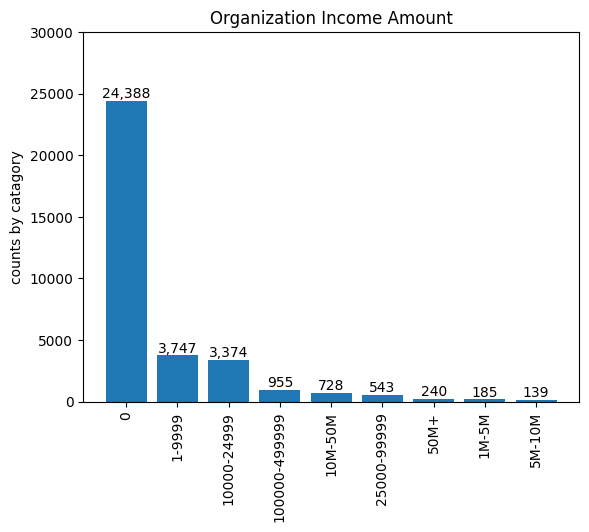

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
bar_container = ax.bar(application_df['INCOME_AMT'].unique(), application_df['INCOME_AMT'].value_counts())
plt.xticks(application_df['INCOME_AMT'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Organization Income Amount', ylim=(0, 30000))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

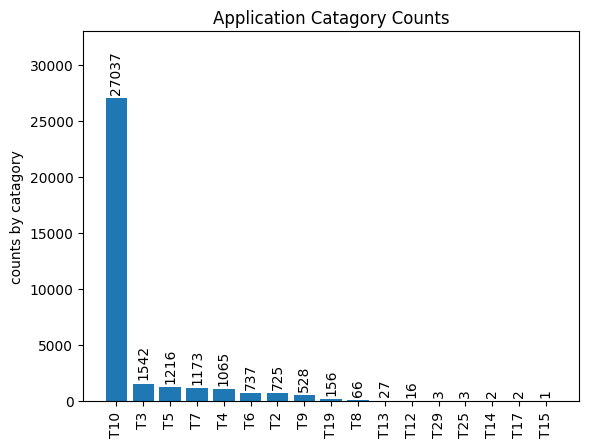

In [43]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['APPLICATION_TYPE'].unique(), application_df['APPLICATION_TYPE'].value_counts())
plt.xticks(application_df['APPLICATION_TYPE'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
#https://stackoverflow.com/questions/71261527/how-to-rotate-data-labels-in-matplotlib-bar-charts-by-90-degrees
ax.set(ylabel='counts by catagory', title='Application Catagory Counts', ylim=(0, 33000))
#ax.bar_label(bar_container, fmt='{:,.0f}')
ax.bar_label(bar_container, padding=3, rotation=90)
plt.show()

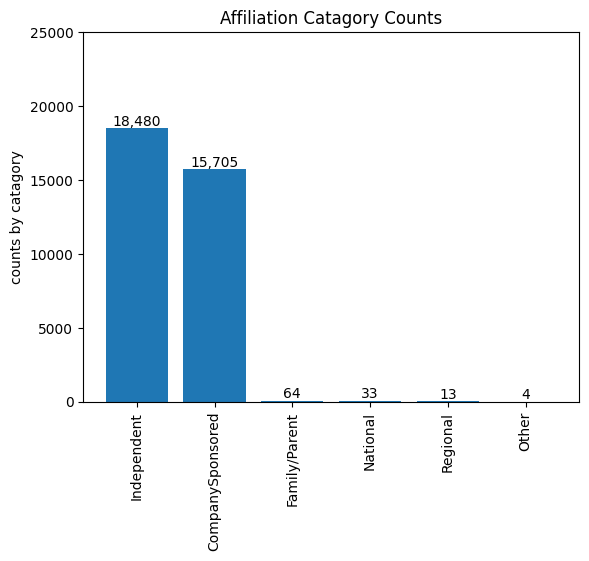

In [44]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['AFFILIATION'].unique(), application_df['AFFILIATION'].value_counts())
plt.xticks(application_df['AFFILIATION'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Affiliation Catagory Counts', ylim=(0, 25000))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

In [53]:
#How many clasifications appear more than once?
 (application_df['CLASSIFICATION'].value_counts()<2).value_counts()

False    45
True     26
Name: CLASSIFICATION, dtype: int64

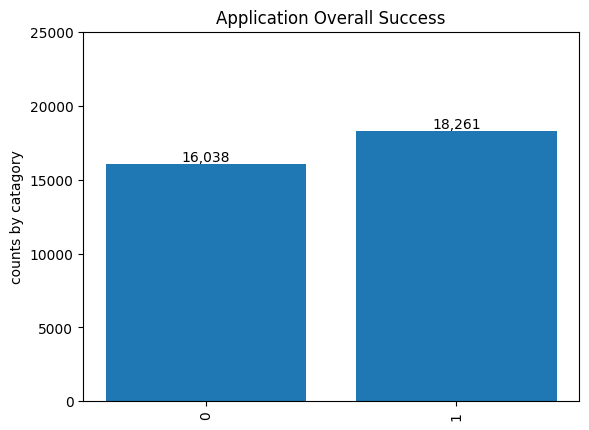

In [48]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['IS_SUCCESSFUL'].unique(), application_df['IS_SUCCESSFUL'].value_counts())
plt.xticks(application_df['IS_SUCCESSFUL'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Application Overall Success', ylim=(0, 25000))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

In [44]:
application_df['IS_SUCCESSFUL']

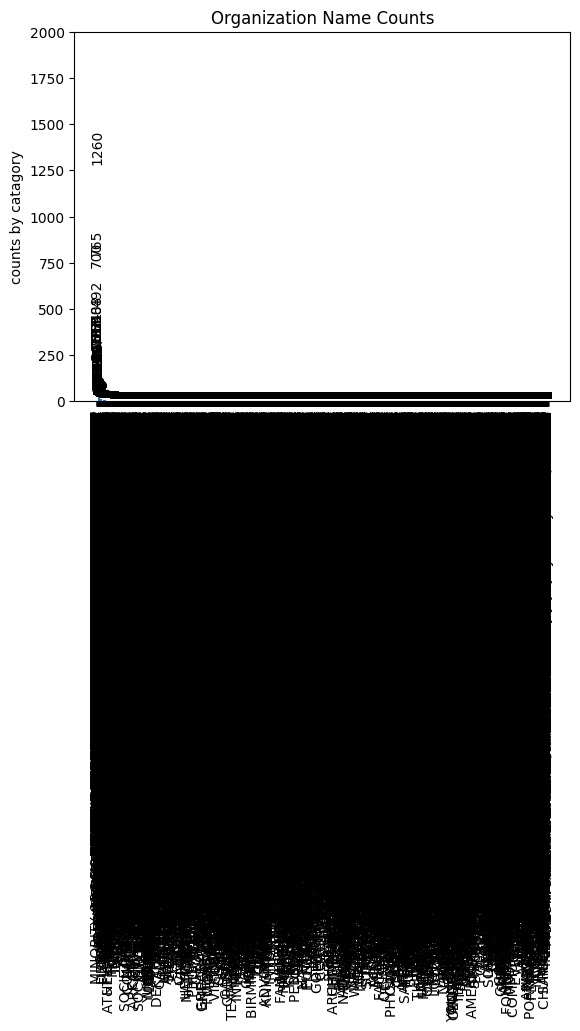

In [45]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['NAME'].unique(), application_df['NAME'].value_counts())
plt.xticks(application_df['NAME'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Organization Name Counts', ylim=(0, 1500))
ax.bar_label(bar_container, padding=3, rotation=90)
plt.show()

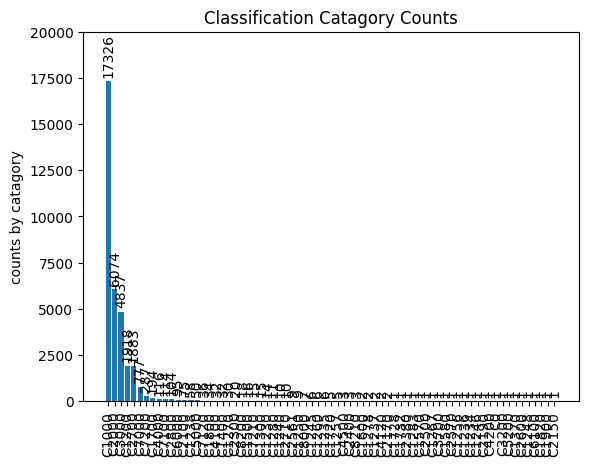

In [30]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['CLASSIFICATION'].unique(), application_df['CLASSIFICATION'].value_counts())
plt.xticks(application_df['CLASSIFICATION'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Classification Catagory Counts', ylim=(0, 20000))
ax.bar_label(bar_container, padding=3, rotation=90)
plt.show()

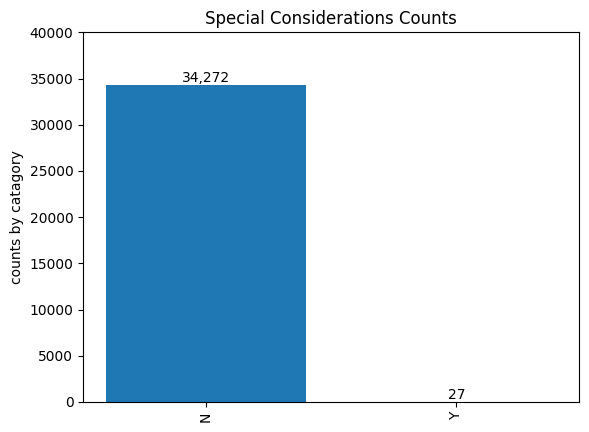

In [47]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['SPECIAL_CONSIDERATIONS'].unique(), application_df['SPECIAL_CONSIDERATIONS'].value_counts())
plt.xticks(application_df['SPECIAL_CONSIDERATIONS'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Special Considerations Counts', ylim=(0, 40000))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

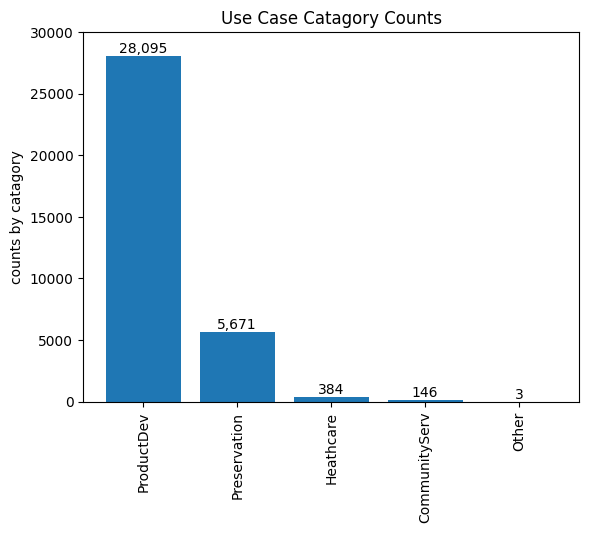

In [18]:
fig, ax = plt.subplots()
bar_container = ax.bar(application_df['USE_CASE'].unique(), application_df['USE_CASE'].value_counts())
plt.xticks(application_df['USE_CASE'].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
ax.set(ylabel='counts by catagory', title='Use Case Catagory Counts', ylim=(0, 30000))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

In [ ]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

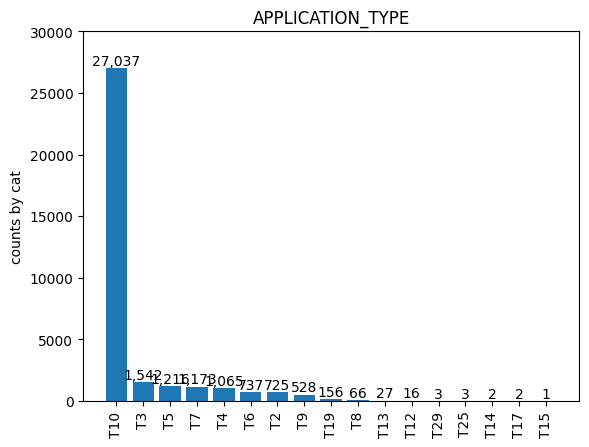

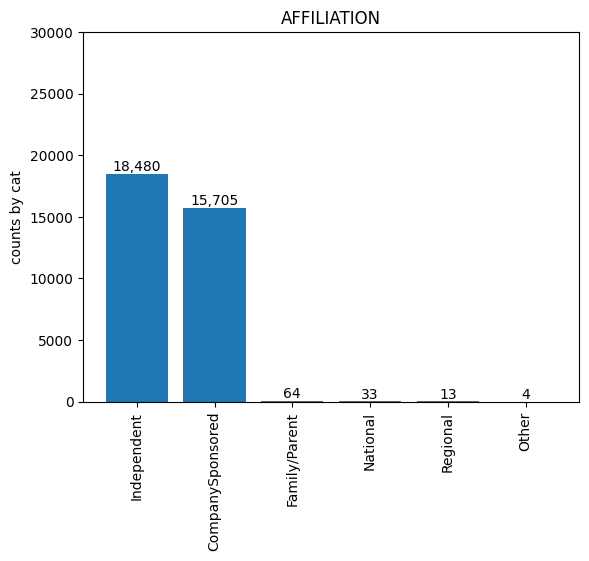

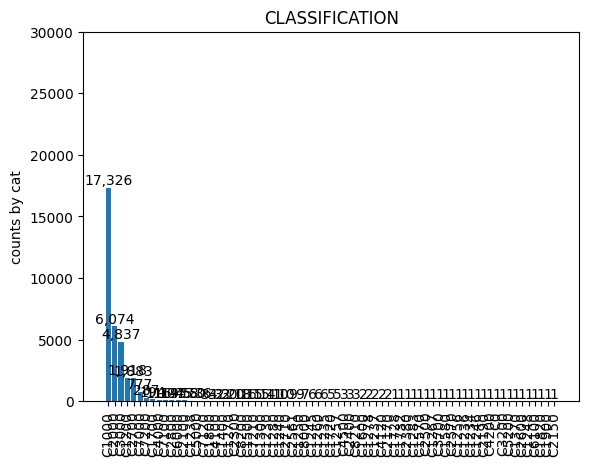

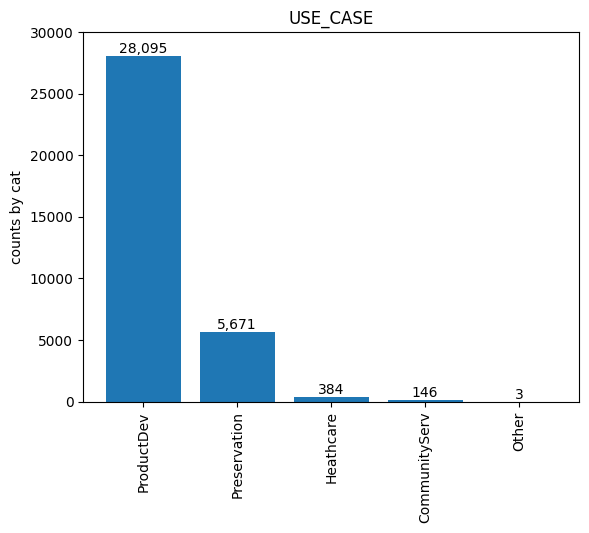

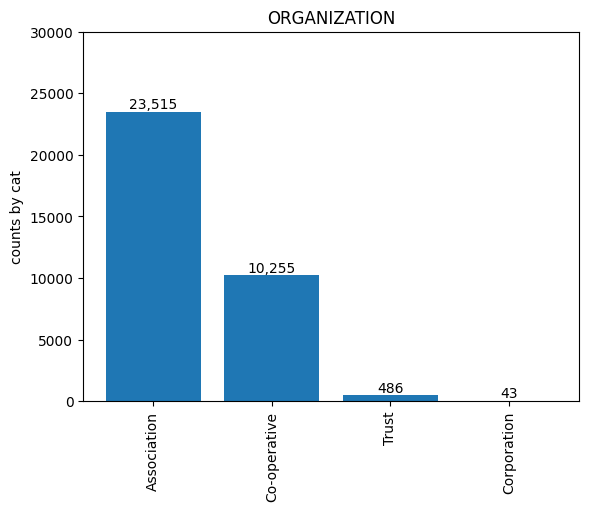

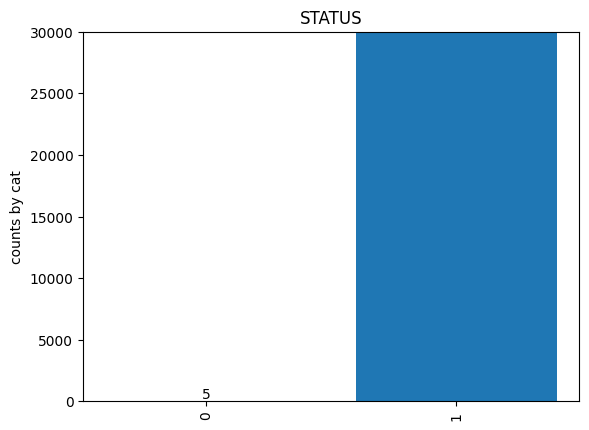

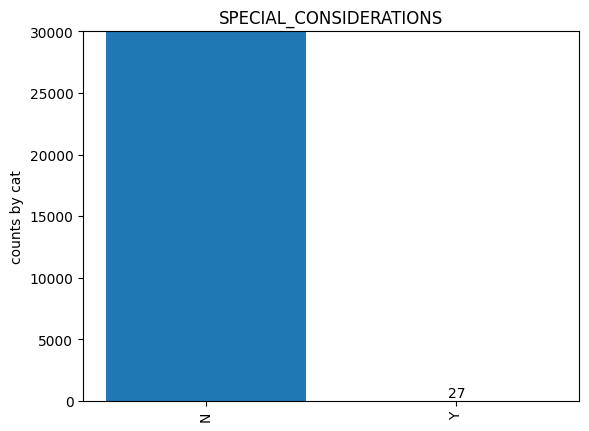

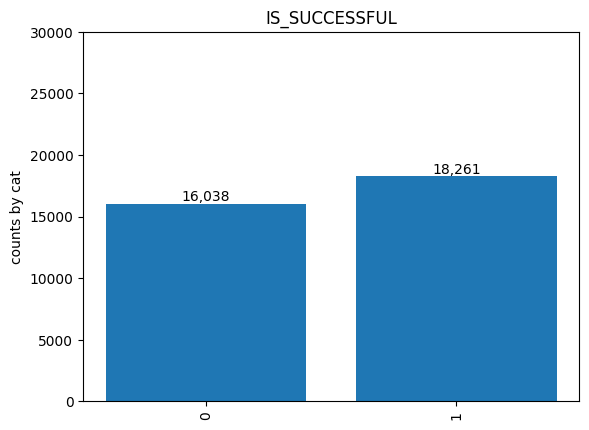

In [ ]:
# All the bars

cols= ['APPLICATION_TYPE', 'AFFILIATION',	'CLASSIFICATION',	'USE_CASE',	'ORGANIZATION',	'STATUS',	'SPECIAL_CONSIDERATIONS',	'IS_SUCCESSFUL']
for col in cols:

  fig, ax = plt.subplots()
  bar_container = ax.bar(application_df[col].unique(), application_df[col].value_counts())
  plt.xticks(application_df[col].unique(), rotation='vertical')
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
  ax.set(ylabel='counts by cat', title=col, ylim=(0, 30000))
  ax.bar_label(bar_container, fmt='{:,.0f}')
  plt.show()

In [ ]:
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00


In [ ]:
application_df['AFFILIATION'].value_counts()

NameError: name 'application_df' is not defined

In [ ]:
t = application_df[''].value_counts()
T = t[t<500].index
# Replace in dataframe
for app in T:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(app,"Other")

# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = t[t<150].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C4120        1
C2600        1
C2190        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C0           3
C1260        3
C2710        3
C1234        2
C1246        2
C1267        2
C3200        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df= pd.get_dummies(application_df)

In [ ]:
scaled = StandardScaler().fit_transform(application_df)

In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

# Second hidden layer
#  YOUR CODE GOES HERE

# Output layer
#  YOUR CODE GOES HERE

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
#  YOUR CODE GOES HERE

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Train the model
#  YOUR CODE GOES HERE

Epoch 1/100
25724/25724 [==============================] - 2s 80us/sample - loss: 0.5700 - acc: 0.7234
Epoch 2/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5556 - acc: 0.7294
Epoch 3/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5529 - acc: 0.7304
Epoch 4/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5514 - acc: 0.7318
Epoch 5/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5495 - acc: 0.7322
Epoch 6/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5488 - acc: 0.7330
Epoch 7/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.5482 - acc: 0.7335
Epoch 8/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5475 - acc: 0.7326
Epoch 9/100
25724/25724 [==============================] - 1s 48us/sample - loss: 0.5468 - acc: 0.73491s - lo
Epoch 10/100
25724/25724 [==============================] - 1s 49u

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5578 - acc: 0.7263
Loss: 0.557812534073699, Accuracy: 0.7262973785400391


In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE